<a href="https://colab.research.google.com/github/gjyakhwa1/Personality-Classification/blob/master/Colab_Notebook/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Importing Packages

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

#Text Preprocessing
import re
import string
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

#Machine Learning Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score


##### Importing CSV file

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
filepath='/content/drive/MyDrive/Colab Notebooks/Project/mbti_1.csv'
df=pd.read_csv(filepath)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [67]:
df['posts'][0]

' moments sportscenter plays pranks what been most lifechanging experience your life repeat most today perc experience immerse last thing friend posted facebook before committing suicide next rest peace hello sorry hear your distress only natural relationship perfection time every moment existence figure hard times times growth welcome stuff game match prozac wellbrutin least thirty minutes moving your legs dont mean moving them while sitting your same desk chair weed moderation maybe edibles healthier alternative basically come with three items youve determined that each type whichever types want would more than likely given each types cognitive functions whatnot when left things moderation sims indeed video game good that note good that somewhat subjective that completely promoting death given dear what were your favorite video games growing what your current favorite video games cool appears late theres someone there everyone wait thought confidence good thing just cherish time soli

In [8]:
df.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


##### Exploratory Data Analysis

Dataset
The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:\
Introversion (I) – Extroversion (E)\
Intuition (N) – Sensing (S)\
Thinking (T) – Feeling (F)\
Judging (J) – Perceiving (P)\
e.g. someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system

In [ ]:
#Shape of the dataframe
df.shape

(8675, 2)

In [ ]:
#checking for null values
df.isna().any()

type     False
posts    False
dtype: bool

In [ ]:
#Description about data
print(df.dtypes)
print('------------------------')
print(df.info())

type     object
posts    object
dtype: object
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [ ]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


**Conclusion**
- Two columns in the dataset with no any null value
- Datatypes are of object type
- There are 16 unique type and 8675 unique posts
- INFP is the most frequently occuring type (1832 times out of 8675)

In [ ]:
#finding unique type
types=df['type'].unique()
types

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

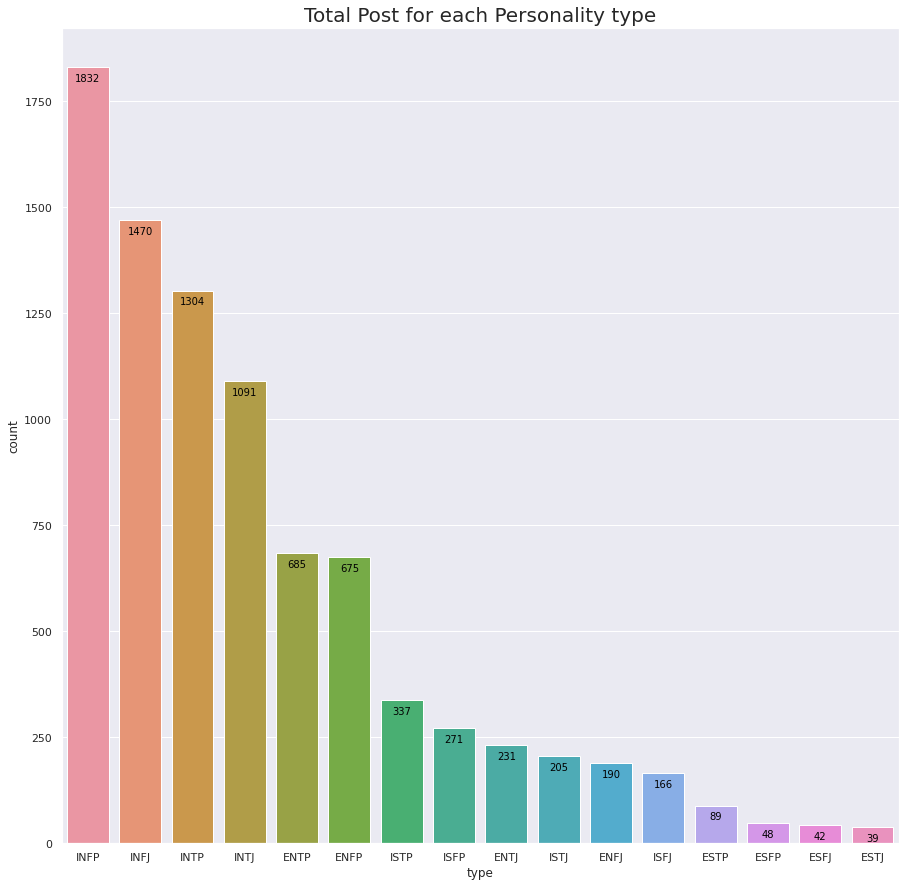

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='type',data=df,order = df['type'].value_counts().index)
ax.set_title('Total Post for each Personality type', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

**Conclusion**: Dataset is highly imbalance throughout the different classes

In [ ]:
df['posts'][0].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

##### Finding the most common words in all posts.


In [ ]:
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

*Note: Words like I, to, the etc doesnot carry any usefule infromation in machine learning. So, these words can be removed

##### WordCloud for each MBTI type

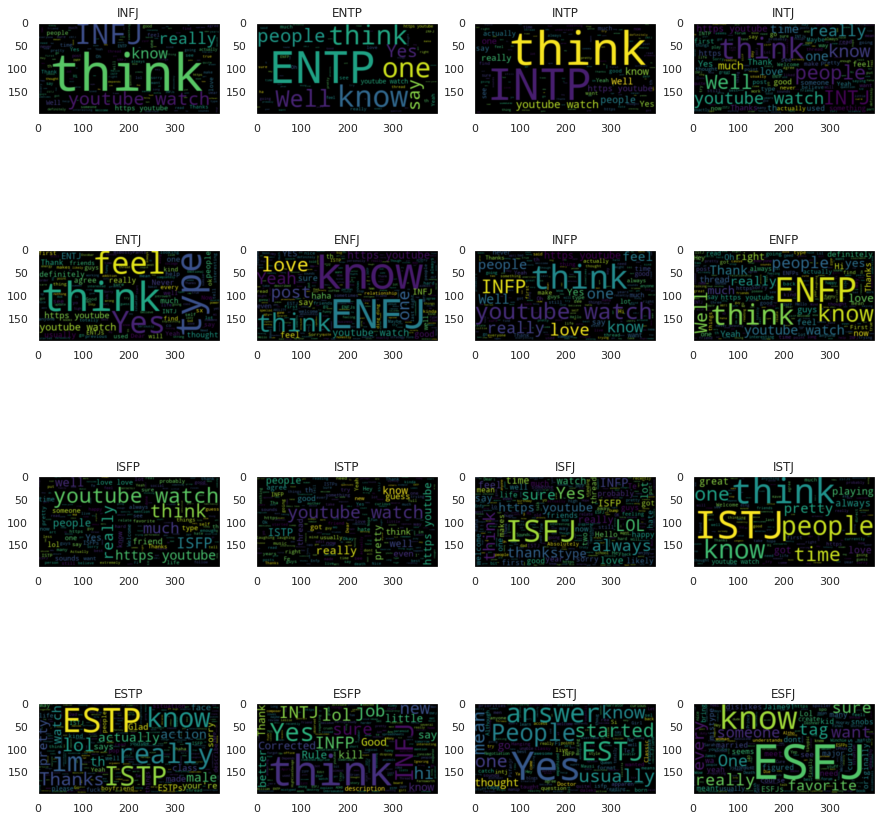

In [ ]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for MBTI in df['type'].unique():
    df_type = df[df['type'] == MBTI]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_type['posts'].to_string())
    plt.subplot(4,4,k+1)
    ax[k].axis("off")
    k+=1
    plt.imshow(wordcloud, interpolation='gaussian')
    plt.title(MBTI)
    plt.grid(None)


##### Splitting the post according to user

Each post contain the comment of 50 user seperated by |||. So, we seperate the comment of each user

In [9]:
def extract_comment(posts, post_per_comment):
    for post in posts[1].split("|||"):
        post_per_comment.append((posts[0], post))

posts = []
df.apply(lambda x: extract_comment(x, posts), axis=1)
print("4 posts from start are:")
posts[0:4]

4 posts from start are:


[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?')]

Cleaning our dataset is required as the post contain several hyperlinks.

In [ ]:
#removing hyperlink
df['posts']=df['posts'].apply(lambda x:re.sub(r'https?:\/\/.*?[\s+]',"",x.replace("|"," ")+" "))

# #Keep the End Of Sentence characters
df['posts'] = df['posts'].apply(lambda x: re.sub(r'(\.)+', ' ', x + " "))
df['posts'] = df['posts'].apply(lambda x: re.sub(r'(\?)+', ' ', x + " "))
df['posts'] = df['posts'].apply(lambda x: re.sub(r'(!)+', ' ', x + " "))

#Remove multiple fullstops
df['posts']=df['posts'].apply(lambda x:re.sub(r'(\.)+','.',x))

#Remove Non-words
df['posts']=df['posts'].apply(lambda x:re.sub(r'[^a-zA-Z\s]','',x))

#Convert posts to lowercase
df['posts']=df['posts'].apply(lambda x:x.lower())

#Remove very short or long words
# df['posts']=df['posts'].apply(lambda x:re.sub(r'((\b\w{0,3})?\b)','',x))
# df['posts']=df['posts'].apply(lambda x:re.sub(r'(\b\w{30,1000})?\b','',x))
df['posts']=df['posts'].apply(lambda x:re.sub(r'((\b\w{0,3})\b)','',x))
df['posts']=df['posts'].apply(lambda x:re.sub(r'(\b\w{30,1000})\b','',x))

#Remove MBTI Personality Words
MBTI_words=[i.lower() for i in list(df['type'].unique())]
remove = '|'.join(MBTI_words)
regex = re.compile(r'('+remove+r')', flags=re.IGNORECASE)
df['posts'] = df['posts'].apply(lambda x:regex.sub("", x))


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/FuseMachine/Project/prerpocess.csv')

##### Import preprocess csv

In [38]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/prerpocess.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,type,posts
0,INFJ,moments sportscenter plays prank...
1,ENTP,finding lack these posts very alarming ...
2,INTP,good course which know thats bles...
3,INTJ,dear enjoyed conversation other esote...
4,ENTJ,youre fired thats another silly misconcepti...


In [39]:
df['posts']=df['posts'].apply(lambda x:re.sub(r'( )+',' ',x))
df.head()

,type,posts
0,INFJ,moments sportscenter plays pranks what been m...
1,ENTP,finding lack these posts very alarming boring...
2,INTP,good course which know thats blessing curse do...
3,INTJ,dear enjoyed conversation other esoteric gabbi...
4,ENTJ,youre fired thats another silly misconception ...


In [40]:
df.head()['posts'][0]

' moments sportscenter plays pranks what been most lifechanging experience your life repeat most today perc experience immerse last thing friend posted facebook before committing suicide next rest peace hello sorry hear your distress only natural relationship perfection time every moment existence figure hard times times growth welcome stuff game match prozac wellbrutin least thirty minutes moving your legs dont mean moving them while sitting your same desk chair weed moderation maybe edibles healthier alternative basically come with three items youve determined that each type whichever types want would more than likely given each types cognitive functions whatnot when left things moderation sims indeed video game good that note good that somewhat subjective that completely promoting death given dear what were your favorite video games growing what your current favorite video games cool appears late theres someone there everyone wait thought confidence good thing just cherish time soli

In [41]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [42]:
X=df['posts']
y=df['type']

##### TFidfVectorizer

In [16]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42,stratify=df.type)

In [19]:
from nltk.stem.porter import *

In [20]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer = WordNetLemmatizer()
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=tokenize)
nltk.download('punkt')
vectorizer.fit(train_data.posts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<function tokenize at 0x7fc42a7bf710>)

In [23]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [24]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [25]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [26]:
y_pred=model_log.predict(test_post)
accuracy=accuracy_score(test_target,y_pred)
accuracy

0.3498559077809798

In [ ]:
from sklearn.metrics import classification_report
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

        ENFJ       0.84      0.96      0.90       732
        ENFP       0.63      0.68      0.65       732
        ENTJ       0.87      0.90      0.89       733
        ENTP       0.70      0.63      0.66       733
        ESFJ       1.00      1.00      1.00       733
        ESFP       1.00      1.00      1.00       732
        ESTJ       1.00      1.00      1.00       733
        ESTP       0.97      0.99      0.98       733
        INFJ       0.31      0.32      0.31       733
        INFP       0.30      0.43      0.35       733
        INTJ       0.58      0.38      0.46       733
        INTP       0.45      0.29      0.35       733
        ISFJ       0.96      0.94      0.95       733
        ISFP       0.86      0.89      0.87       733
        ISTJ       0.94      0.93      0.94       733
        ISTP       0.84      0.85      0.84       733

    accuracy                           0.76     11725
   macro avg       0.76   

##### LabelEncoding

In [43]:
df['encoded_type']=LabelEncoder().fit_transform(df['type'])
df.head(20)

,type,posts,encoded_type
0,INFJ,moments sportscenter plays pranks what been m...,8
1,ENTP,finding lack these posts very alarming boring...,3
2,INTP,good course which know thats blessing curse do...,11
3,INTJ,dear enjoyed conversation other esoteric gabbi...,10
4,ENTJ,youre fired thats another silly misconception ...,2
5,INTJ,science perfect scientist claims that that sc...,10
6,INFJ,cant draw nails haha those were done professi...,8
7,INTJ,tend build collection things desktop that fre...,10
8,INFJ,sure thats good question distinction between ...,8
9,INTP,this position where have actually person vari...,11


##### CountVectorizer


In [44]:
vectorizer=CountVectorizer(stop_words='english')
vectorize_posts = vectorizer.fit_transform(df["posts"])

In [45]:
vectorize_posts.shape

(8675, 123663)

##### Stopwords removal

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### Lemmatization

In [48]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [49]:
def clean_abstract(text):
  text = [i for i in text.split() if i not in stopwords.words('english')]
  # text = [lemmatizer.lemmatize(i) for i in text]
  text=[stemmer.stem(i) for i in text]
  text = ' '.join(text)
  text.replace('\n',' ')
  return text

In [ ]:
clean_abstract('Hello I am coming houses home')

'hello I come hous home'

In [ ]:
df['posts']=df['posts'].apply(lambda x:clean_abstract(x))

In [ ]:
df.head()

##### OverSampling

In [50]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(vectorize_posts, y)

In [70]:
X_over

<29312x123663 sparse matrix of type '<class 'numpy.int64'>'
	with 13049544 stored elements in Compressed Sparse Row format>

In [51]:
y_over.value_counts()

INFJ    1832
ENTP    1832
INTP    1832
INTJ    1832
ENTJ    1832
ENFJ    1832
INFP    1832
ENFP    1832
ISFP    1832
ISTP    1832
ISFJ    1832
ISTJ    1832
ESTP    1832
ESFP    1832
ESTJ    1832
ESFJ    1832
Name: type, dtype: int64

In [52]:
pd.DataFrame(y_over.value_counts())['type'].index

Index(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 'ISFP',
       'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype='object')

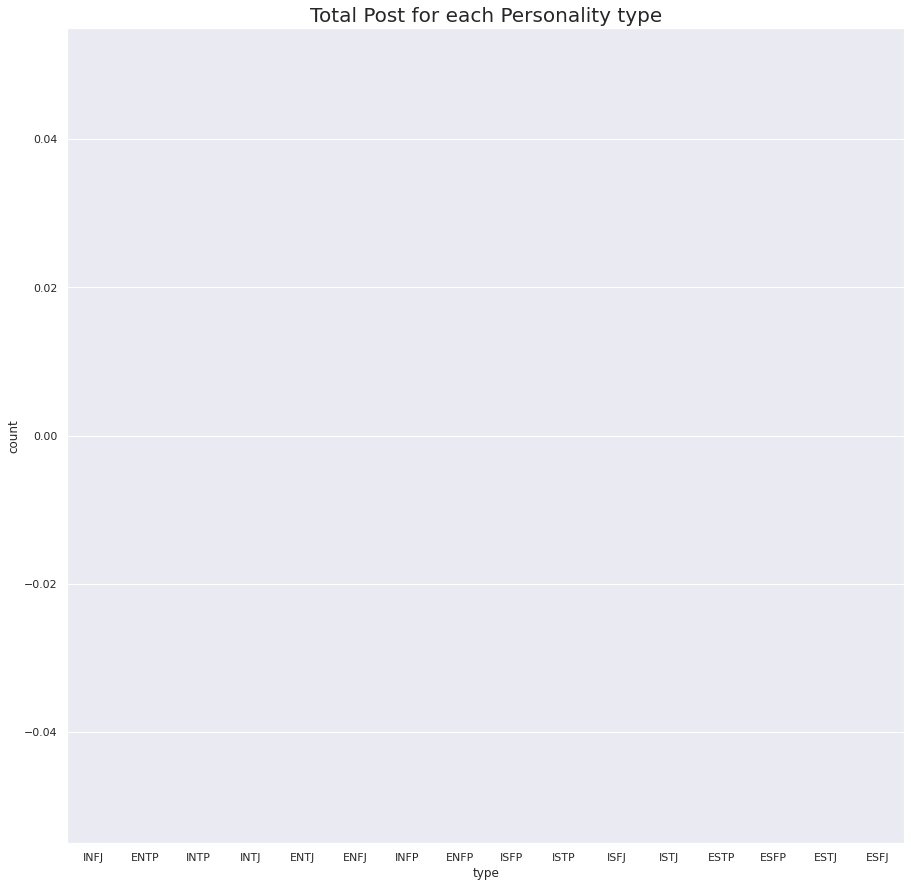

In [53]:
data=pd.DataFrame(y_over.value_counts())
sns.set(rc={'figure.figsize':(15,15)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='type',data=data,order = data['type'].index)
ax.set_title('Total Post for each Personality type', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

##### Train test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.4, stratify=y_over, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(17587, 123663) (17587,) (11725, 123663) (11725,)


In [71]:
y_test

4046     INFP
20656    ESTP
27956    ISTP
29049    ISTP
16910    ESFP
         ... 
3675     ENTJ
3833     INFP
23371    ISFJ
19192    ESTJ
23114    ISFJ
Name: type, Length: 11725, dtype: object

##### Model training and prediction

###### Linear Support Vector Classifier

In [55]:
model_linear_svc=LinearSVC(multi_class='ovr',max_iter=2000)
model_linear_svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=2000)

In [56]:
y_pred_svc=model_linear_svc.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

        ENFJ       0.91      0.97      0.94       732
        ENFP       0.72      0.71      0.71       732
        ENTJ       0.89      0.95      0.92       733
        ENTP       0.75      0.70      0.72       733
        ESFJ       0.98      1.00      0.99       733
        ESFP       0.98      1.00      0.99       732
        ESTJ       0.98      1.00      0.99       733
        ESTP       0.96      1.00      0.98       733
        INFJ       0.47      0.40      0.43       733
        INFP       0.45      0.37      0.41       733
        INTJ       0.56      0.55      0.55       733
        INTP       0.51      0.48      0.50       733
        ISFJ       0.90      0.96      0.93       733
        ISFP       0.87      0.92      0.90       733
        ISTJ       0.90      0.96      0.93       733
        ISTP       0.84      0.89      0.86       733

    accuracy                           0.80     11725
   macro avg       0.79   

###### K neighbours Classifier

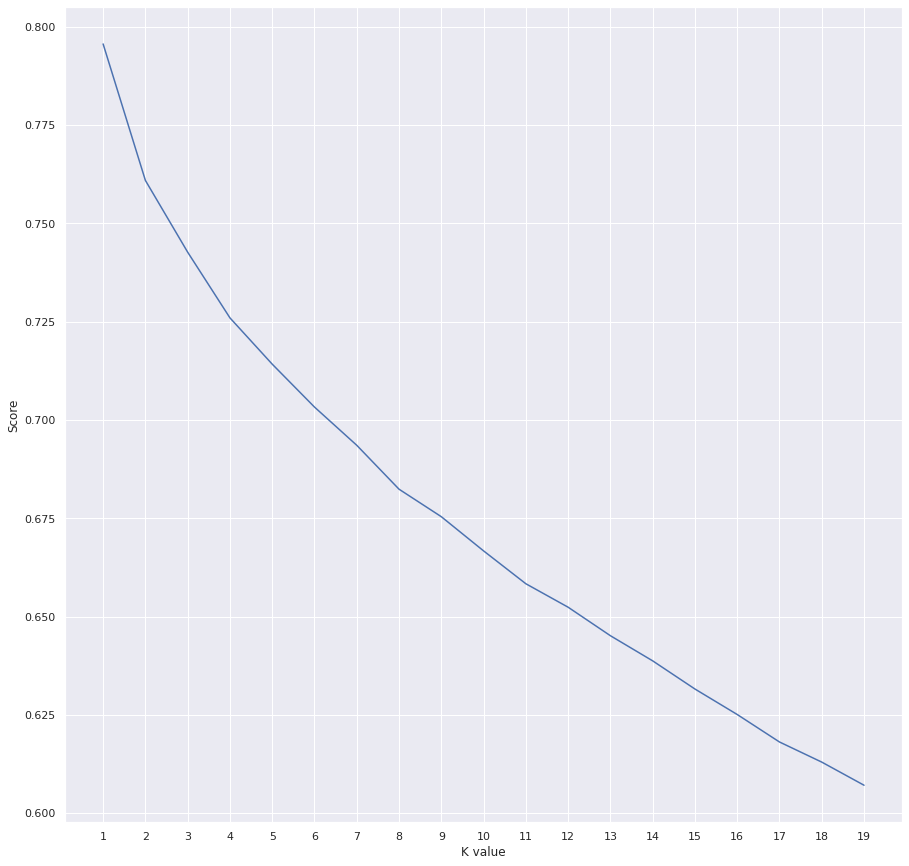

In [58]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [59]:
scoreList

[0.7956503198294244,
 0.7609381663113006,
 0.7426865671641791,
 0.7259701492537314,
 0.7142004264392324,
 0.7032835820895522,
 0.6935607675906184,
 0.6823880597014925,
 0.6753944562899786,
 0.6666950959488273,
 0.6583368869936034,
 0.6523667377398721,
 0.6451172707889126,
 0.6387206823027719,
 0.6315565031982943,
 0.6250746268656716,
 0.6180810234541578,
 0.6129637526652452,
 0.6070788912579957]

In [60]:
model_knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred_knn))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ENFJ       0.65      1.00      0.78       732
        ENFP       0.66      0.80      0.72       732
        ENTJ       0.75      0.98      0.85       733
        ENTP       0.69      0.78      0.73       733
        ESFJ       0.82      1.00      0.90       733
        ESFP       0.77      1.00      0.87       732
        ESTJ       0.87      1.00      0.93       733
        ESTP       0.72      1.00      0.83       733
        INFJ       0.59      0.20      0.30       733
        INFP       0.00      0.00      0.00       733
        INTJ       0.73      0.41      0.52       733
        INTP       0.61      0.28      0.38       733
        ISFJ       0.75      0.97      0.84       733
        ISFP       0.87      0.95      0.91       733
        ISTJ       0.91      0.97      0.94       733
        ISTP       0.88      0.85      0.86       733

    accuracy                           0.76     11725
   macro avg       0.70   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Random Forest Classifier

In [62]:
model_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
model_classifier.fit(X_train,y_train)
y_pred_tree = model_classifier.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

        ENFJ       0.86      0.96      0.91       732
        ENFP       0.66      0.68      0.67       732
        ENTJ       0.86      0.92      0.89       733
        ENTP       0.69      0.63      0.66       733
        ESFJ       1.00      1.00      1.00       733
        ESFP       0.99      1.00      1.00       732
        ESTJ       1.00      1.00      1.00       733
        ESTP       0.99      0.99      0.99       733
        INFJ       0.31      0.35      0.33       733
        INFP       0.31      0.45      0.37       733
        INTJ       0.63      0.38      0.47       733
        INTP       0.47      0.30      0.36       733
        ISFJ       0.93      0.95      0.94       733
        ISFP       0.87      0.91      0.89       733
        ISTJ       0.94      0.94      0.94       733
        ISTP       0.84      0.83      0.84       733

    accuracy                           0.77     11725
   macro avg       0.77   

###### MultiNomial Naive Bayes

In [74]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(X_train,y_train)

MultinomialNB()

In [75]:
y_pred_multi=model_multinomial_nb.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred_multi))

              precision    recall  f1-score   support

        ENFJ       0.59      0.89      0.71       732
        ENFP       0.48      0.54      0.51       732
        ENTJ       0.94      0.71      0.81       733
        ENTP       0.80      0.37      0.51       733
        ESFJ       0.83      0.98      0.90       733
        ESFP       0.96      0.92      0.94       732
        ESTJ       0.99      0.98      0.99       733
        ESTP       0.96      0.90      0.93       733
        INFJ       0.31      0.35      0.33       733
        INFP       0.28      0.84      0.42       733
        INTJ       0.56      0.16      0.24       733
        INTP       0.44      0.31      0.37       733
        ISFJ       0.83      0.84      0.84       733
        ISFP       0.95      0.65      0.77       733
        ISTJ       0.98      0.66      0.79       733
        ISTP       0.98      0.53      0.69       733

    accuracy                           0.67     11725
   macro avg       0.74   

###### Logistic Regression

In [77]:
# Logistic Regression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [78]:
# evaluate predictions
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

        ENFJ       0.89      0.94      0.91       732
        ENFP       0.68      0.64      0.66       732
        ENTJ       0.87      0.91      0.89       733
        ENTP       0.68      0.65      0.67       733
        ESFJ       0.99      0.99      0.99       733
        ESFP       0.97      0.99      0.98       732
        ESTJ       0.99      1.00      0.99       733
        ESTP       0.95      0.97      0.96       733
        INFJ       0.44      0.37      0.40       733
        INFP       0.45      0.47      0.46       733
        INTJ       0.50      0.51      0.50       733
        INTP       0.52      0.52      0.52       733
        ISFJ       0.91      0.91      0.91       733
        ISFP       0.87      0.88      0.88       733
        ISTJ       0.90      0.91      0.91       733
        ISTP       0.82      0.85      0.84       733

    accuracy                           0.78     11725
   macro avg       0.78   

#### Dump model

In [79]:
import pickle
pickle.dump(model_knn,open("knn.sav", 'wb'))